# Logistic Regression with [Breast Cancer Wisconsin Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Data 

In [2]:
df_data = pd.read_csv('data.csv')

In [3]:
df_data.tail(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [4]:
df_data.shape

(569, 33)

In [6]:
df_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
##target feature
df_data.select_dtypes(exclude=["number"])

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


## Missing Data

In [11]:
df_data.isnull().sum().

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
## we will drop unamed column 32 and  id column 
df_data.drop(['id', 'Unnamed: 32'],axis=1,inplace=True)

In [9]:
### now see how many rows and columns  we have
df_data.shape


(569, 31)

### Categorical Data Transformation for diagnosis (Target)


In [12]:
df_data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [13]:
df_data['diagnosis'].replace(to_replace=['M','B'], value = [1,0], inplace=True)

In [151]:
###now we check de replacement
df_data_processing = df_data.copy()
df_data_processing.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [17]:
df_data_processing.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


## Correlation analsys

<Axes: >

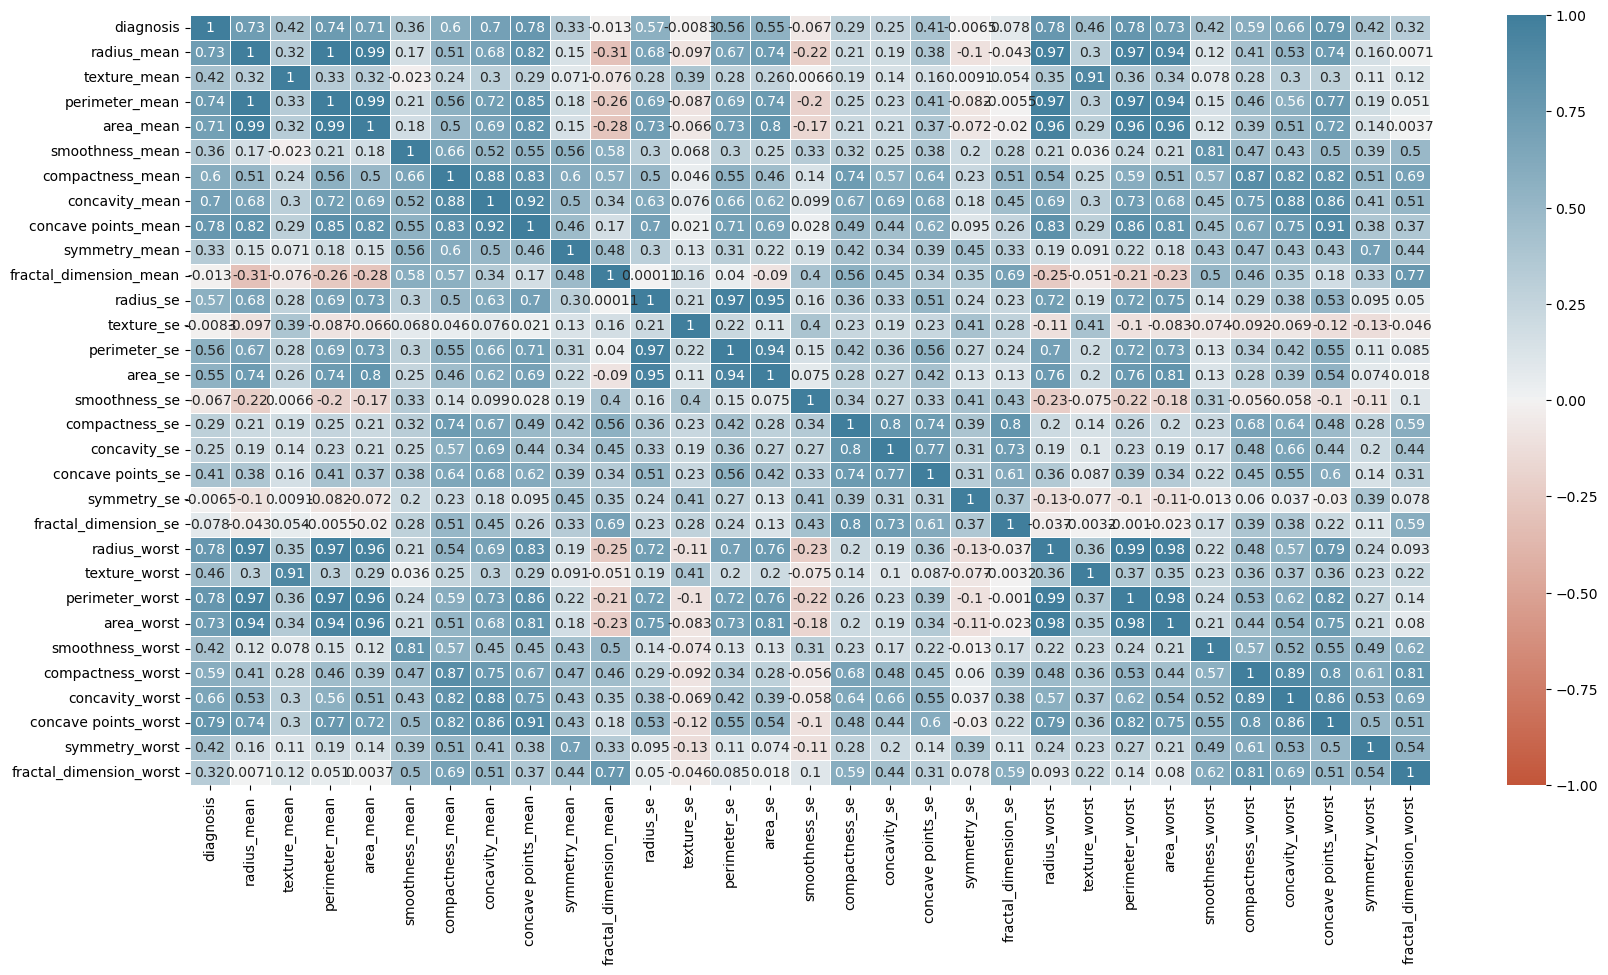

In [22]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(
    data=df_data_processing.corr(),
    cmap= sns.diverging_palette(20,230, as_cmap=True), 
    center=0,
    vmin=-1, 
    vmax=1,
    linewidths=0.5, 
    annot=True)

#### We have multicolliniarity, in this case  will drop some high correlated features 

In [142]:
corre=df_data_processing.drop(columns="diagnosis").corr()


In [239]:
###some functions that i created in order to detect the pair of high corrleated features 
combinations = []
 
for i in range(len(corre.columns)):
    for j in range(len(corre.columns)):
        combinations.append((corre.columns[i],corre.columns[j]))

high_corr=[]
for i in combinations:
    if corre[i[1]][i[0]] >= 0.80 and corre[i[1]][i[0]] < 1: ##3select all featute correlations with equal or more than 0.80
        high_corr.append(i)

unique_corre=[]
for i in high_corr:
    if (i[0], i[1]) not in unique_corre and (i[1], i[0]) not in unique_corre: ##remove repited combinations 
           unique_corre.append((i[0], i[1]))

eliminate_columns=[]  
for i in unique_corre:
      if i[0] not in eliminate_columns:
           eliminate_columns.append((i[0]))

len(eliminate_columns)



16

In [152]:
df_data_processing.drop(eliminate_columns, axis=1, inplace=True)
df_data_processing


,diagnosis,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.2419,0.07871,0.9053,0.006399,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.16220,0.2654,0.4601,0.11890
1,1,0.1812,0.05667,0.7339,0.005225,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.12380,0.1860,0.2750,0.08902
2,1,0.2069,0.05999,0.7869,0.006150,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.14440,0.2430,0.3613,0.08758
3,1,0.2597,0.09744,1.1560,0.009110,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.20980,0.2575,0.6638,0.17300
4,1,0.1809,0.05883,0.7813,0.011490,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.13740,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.1726,0.05623,1.2560,0.010300,0.05198,0.02454,0.01114,0.004239,26.40,2027.0,0.14100,0.2216,0.2060,0.07115
565,1,0.1752,0.05533,2.4630,0.005769,0.03950,0.01678,0.01898,0.002498,38.25,1731.0,0.11660,0.1628,0.2572,0.06637
566,1,0.1590,0.05648,1.0750,0.005903,0.04730,0.01557,0.01318,0.003892,34.12,1124.0,0.11390,0.1418,0.2218,0.07820
567,1,0.2397,0.07016,1.5950,0.006522,0.07117,0.01664,0.02324,0.006185,39.42,1821.0,0.16500,0.2650,0.4087,0.12400


<Axes: >

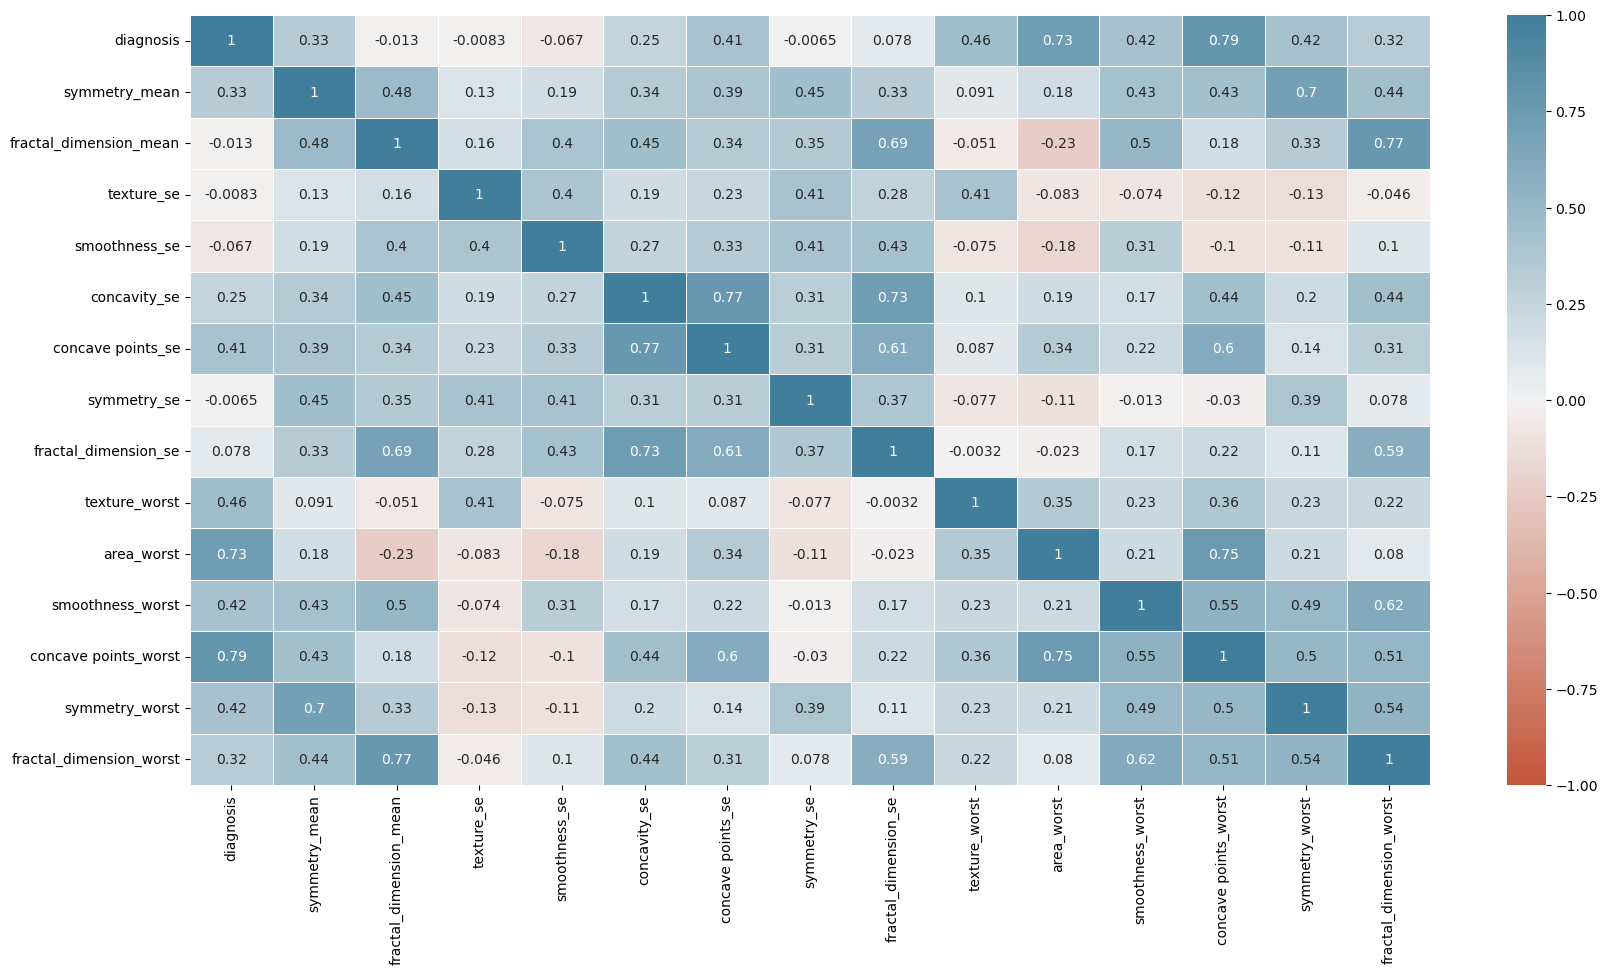

In [153]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(
    data=df_data_processing.corr(),
    cmap= sns.diverging_palette(20,230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5, 
    annot=True)

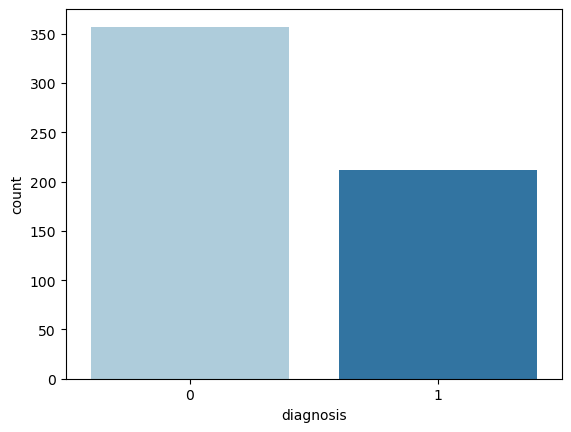

In [175]:
sns.countplot( data= df_data_processing, x='diagnosis',palette="Paired")
plt.show()

#### the diagnosis variable is unbalanced but we dont have enough data for subsampling

## Split and Scaling

In [156]:
X = df_data_processing.drop('diagnosis',axis=1)
y = df_data_processing.diagnosis.values

In [203]:

X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size= .2)

In [204]:

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train) 
X_test = st_x.transform(X_test)

## Model 

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [208]:
param=  {'C': [0.01,0.1,1,2.5,5,10,15,30,40,55,100],
         'tol':[0.000001,0.00001,0.0001,0.1,1],
        'solver' : ['lbfgs', 'liblinear'],
        "class_weight":["balanced"]

        }

In [209]:
grid_reg = GridSearchCV(LogisticRegression(), param, cv=5).fit(X_train, y_train)

In [211]:
grid_reg.best_params_

{'C': 2.5, 'class_weight': 'balanced', 'solver': 'lbfgs', 'tol': 1e-06}

In [216]:
model=grid_reg.best_estimator_

## Cross validation

In [240]:
final_result = cross_validate(model, X_train, y_train, return_train_score=True, cv=5,)
print(f" mean train score:{np.mean(final_result['train_score'])}")
print(f" mean test score:{np.mean(final_result['test_score'])}")

 mean train score:0.9747252747252746
 mean test score:0.9648351648351647


# Test the model 

In [227]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

prediction_test = model.predict(X_test)
print("accuracy", accuracy_score(y_test,prediction_test ))
print("precision", precision_score(y_test,prediction_test ))
print("recall_score",recall_score(y_test,prediction_test ))
print("f1_score",f1_score(y_test,prediction_test ))

accuracy 0.9649122807017544
precision 0.9534883720930233
recall_score 0.9534883720930233
f1_score 0.9534883720930233


## Confusion Matrix

<Figure size 1100x1100 with 0 Axes>

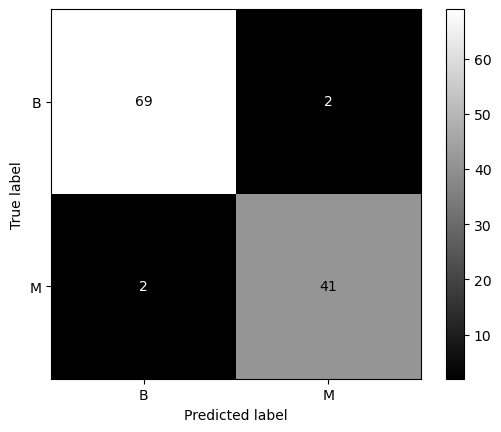

In [218]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['B','M'])
disp.plot(cmap='gray')
plt.show()

In [228]:
# The porba
proba=model.predict_proba(X_test)

## Roc PLot

In [229]:
import scikitplot as skplt

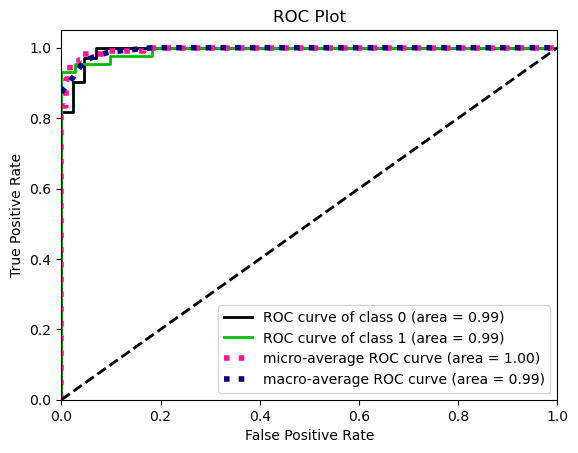

In [231]:
skplt.metrics.plot_roc(y_test, proba, title = 'ROC Plot')
plt.show()

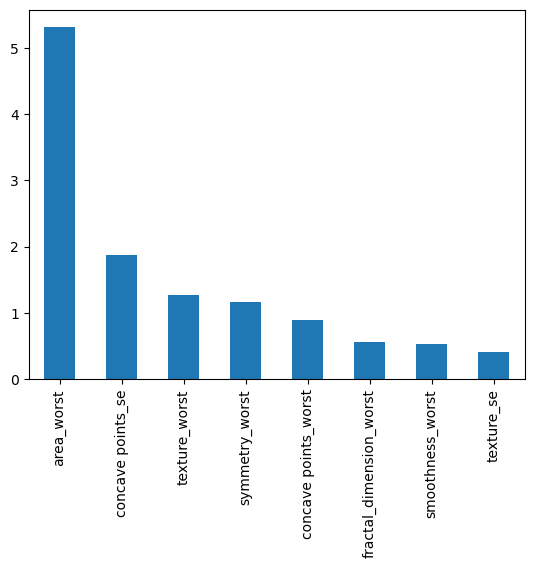

In [236]:
# weight of variables
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
weights.sort_values(ascending=False)[:8].plot(kind='bar')
plt.show()

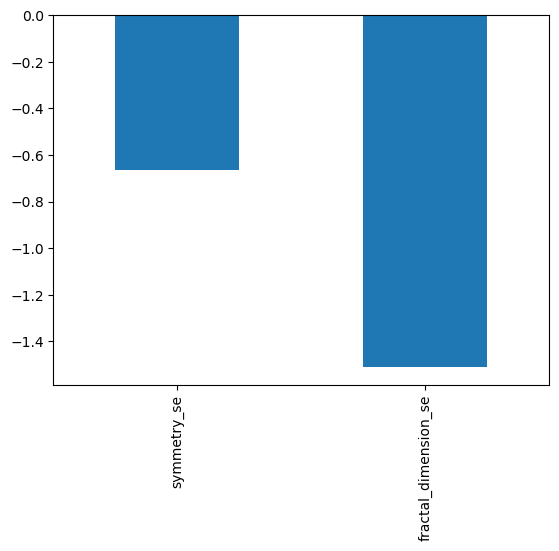

In [238]:
weights.sort_values(ascending=False)[-2:].plot(kind='bar')
plt.show()